## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Introduction

#### Business Overview:

* Mzalendo ltd is a housing stakeholder that gives advice to homeowners so that they can buy or sell homes.
The company want to help homeowners to be able to predict the current and future prices of their houses depending on different features.

#### Challenges:
* Data quality issues: The dataset may contain errors, inconsistencies, or missing values, which can impact the accuracy of the regression analysis.

* Complexity of the housing market: The housing market can be complex and dynamic, and factors such as economic conditions, interest rates, and demographic changes can all impact home values. This can make it challenging to accurately predict the impact of renovations on home values.

* Limited resources: Building an accurate regression model can be time-consuming and resource-intensive, and may require specialized expertise in data analysis and statistics.

* Communication with stakeholders: It is important to effectively communicate the findings and recommendations to the stakeholders, who may have varying levels of technical expertise or understanding of the analysis. Clear and concise communication is essential to ensure that the stakeholders can make informed decisions based on the results.



#### Proposed Solution:
* Our proposed solution to address the business problem and meet the project objectives is to use multiple linear regression modeling to analyze the King County House Sales dataset, which contains information on various factors that can influence the value of a home.

#### Conclusion:
* We aim to use multiple linear regression modeling,So that we can analyze the King County House Sales dataset to identify the most important factors that impact the value of a home, build an accurate regression model to predict home values, and provide guidance to homeowners on how to increase the estimated value of their homes through renovations.


## Business Problem
#### The business problem for this project is to provide guidance to homeowners on how home renovations might increase the estimated value of their homes, and by what amount. 

## Objectives

* To identify the most important factors that affect the value of a home in a northwestern county, and to determine the extent to which these factors impact home values.
* To build a multiple linear regression model that accurately predicts the value of a home based on these factors.
* To use the regression model to provide guidance to homeowners on how home renovations can increase the estimated value of their homes, and by what amount.
* To evaluate the performance of the regression model using appropriate metrics, and to compare the results of different models to determine the best approach.
* To communicate the findings and recommendations to the stakeholders in a clear and concise manner, and to ensure that they understand the implications of the results for their business.


## Analytical Questions
1. Which features have the strongest correlation with home sale price?
2. Are there any variables that need to be transformed or standardized before being used in the model?
3. How can we evaluate the performance of our model and ensure that it is not overfitting to the data?
4. How can we communicate the results of our analysis to stakeholders in a clear and actionable manner?

## Data Understanding

#### We will need to carefully examine each variable and determine its relevance to our business problem, as well as identify any missing or erroneous values that may need to be cleaned or imputed.We may also need to consider the relationships between different variables, and whether any transformations or interactions may be necessary to build an accurate regression model.Overall, our goal in data understanding is to gain a comprehensive understanding of the dataset and ensure its quality and suitable for analysis.

# Loading Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [2]:
#load the data
data_df = pd.read_csv("data/kc_house_data.csv")
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Statistical Analysis

In [3]:
def analyze_dataset(filename):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", data_df.shape)
    
    # Output the column names of the dataset
    print("Column names:", list(data_df.columns))
    
    # Output information about the dataset
    print(data_df.info())
    # output descriptive statistics about the dataset
    print(data_df.describe())

In [4]:
analyze_dataset("kc_house_data.csv")

Shape of dataset: (21597, 21)
Column names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non

# Data Pre_processing

# Duplicates

In [5]:
#checking for duplicates 
print("Number of duplicates: ",data_df.duplicated().sum())

Number of duplicates:  0


## Missing Values
* define a function for duplicates, isnull & sum, outliers,

In [6]:
# a more interpretable version
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    
    return missing


missing_data = missing_values(data_df)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
sqft_lot15,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


### Categorical columns


~ Our categorical columns are:
* waterfront      
* view            
* condition      
* grade    

In [7]:
# identify the categorical variables in the dataset and visualize them
# define a function to use to the above
# Fuction to get the value counts of the data in the columns
def get_value_counts(df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = df[col].value_counts(dropna=False)
    return counts

# Function to visualise the the data in the columns
def plot_data(df, col, title):
    ''' Plots the value counts of a column in a dataframe as a bar chart '''
    get_value_counts(df, col).plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=0);

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64


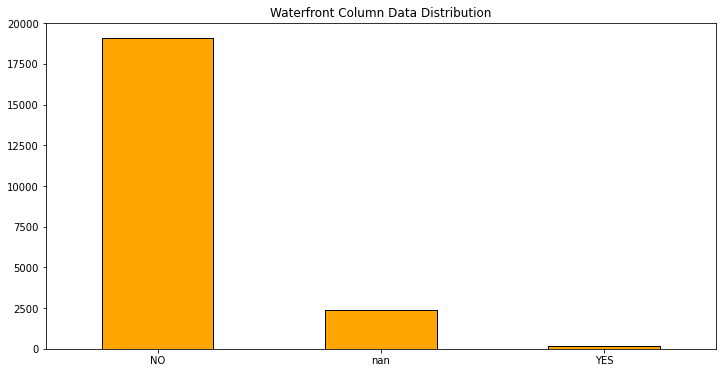

In [8]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'waterfront'))

# Visualise the data distribution
plot_data(data_df, 'waterfront', 'Waterfront Column Data Distribution') 

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64


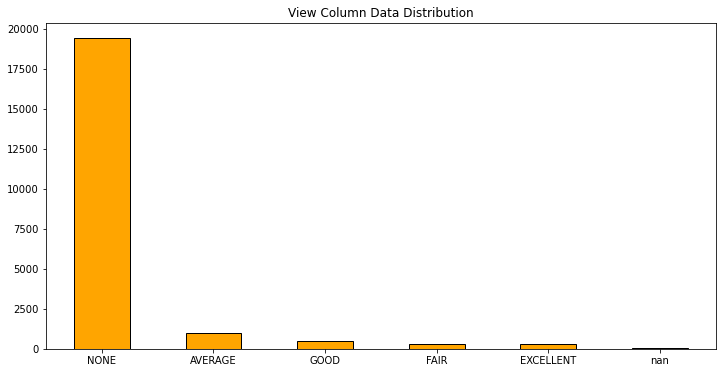

In [9]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'view'))

# Visualise the data distribution
plot_data(data_df, 'view', 'View Column Data Distribution') 

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


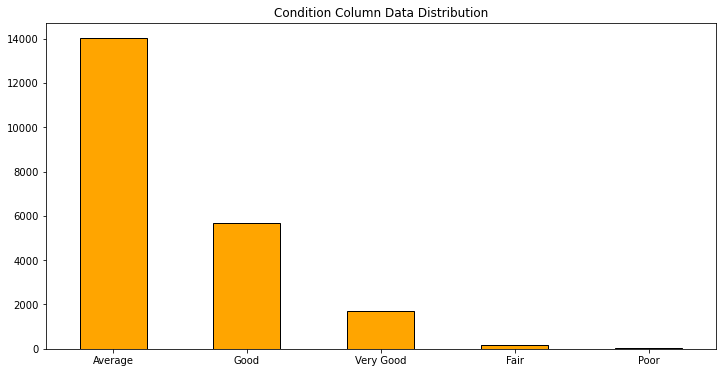

In [10]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'condition'))

# Visualise the data distribution
plot_data(data_df, 'condition', 'Condition Column Data Distribution') 

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


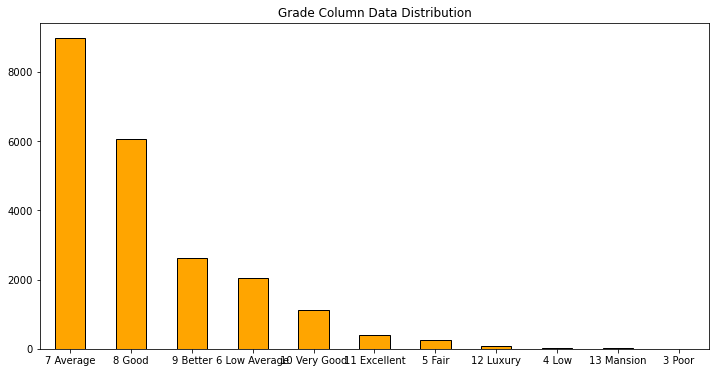

In [11]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'grade'))

# Visualise the data distribution
plot_data(data_df, 'grade', 'Grade Column Data Distribution') 

### Numeric Features

In [12]:
#plot_numerical_distribution(data_df, col, title, bins_=10)

In [13]:
# Function that describes the statistics of the data
def describe_numeric_data(data_df, col):
    ''' Returns the statistics of a column in a dataframe '''
    print(data_df[col].describe())

# Function to plot the histogram, kde and boxplot of the data
def plot_numeric_distribution(data_df, col, title, bins_=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(data_df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=data_df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();


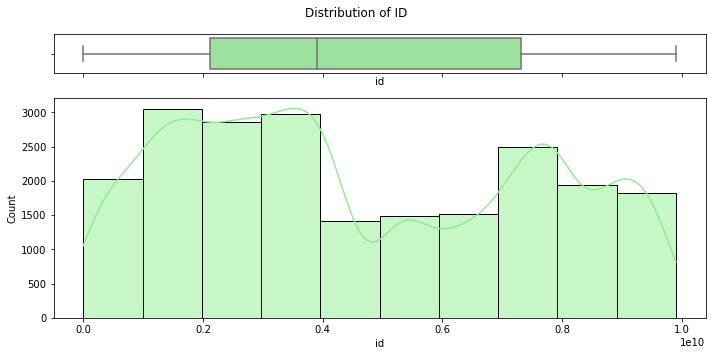

In [14]:
plot_numeric_distribution(data_df, 'id', 'Distribution of ID')

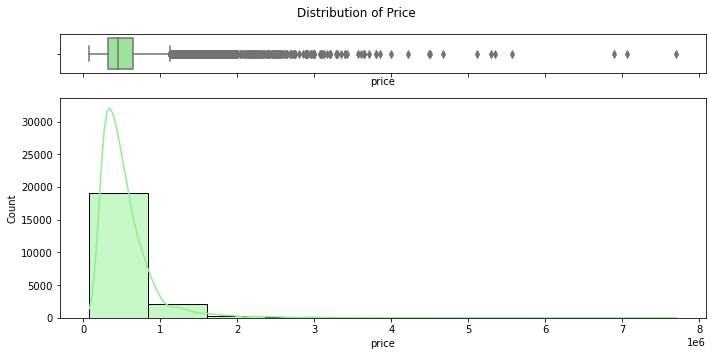

In [15]:
plot_numeric_distribution(data_df, 'price', 'Distribution of Price')

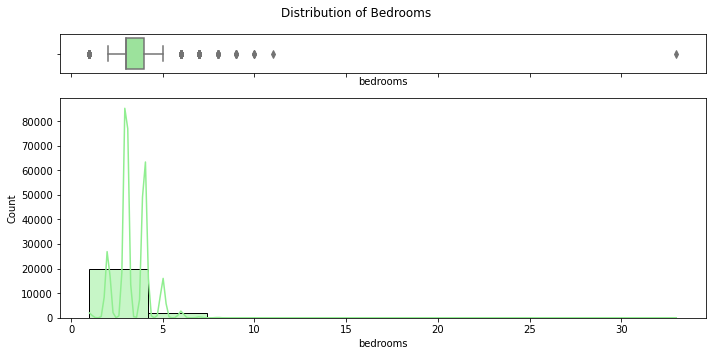

In [16]:
plot_numeric_distribution(data_df, 'bedrooms', 'Distribution of Bedrooms')

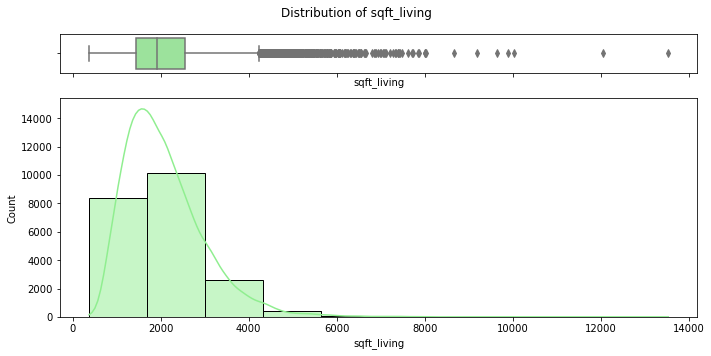

In [17]:
plot_numeric_distribution(data_df, 'sqft_living', 'Distribution of sqft_living')

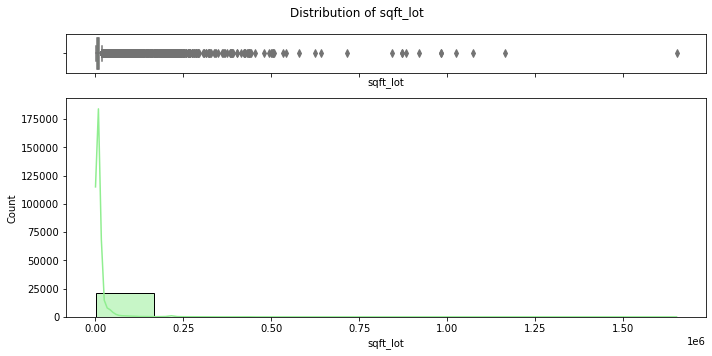

In [18]:
plot_numeric_distribution(data_df, 'sqft_lot', 'Distribution of sqft_lot')

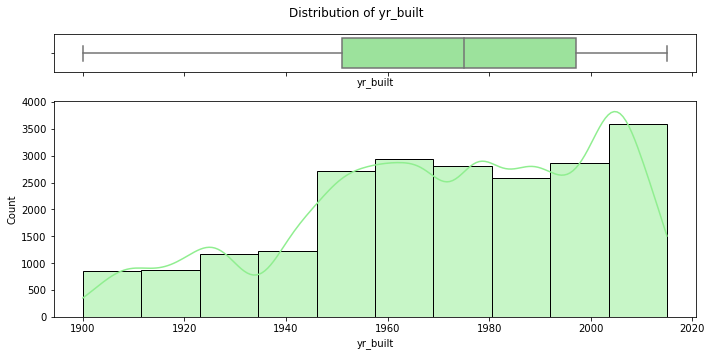

In [19]:
plot_numeric_distribution(data_df, 'yr_built', 'Distribution of yr_built')

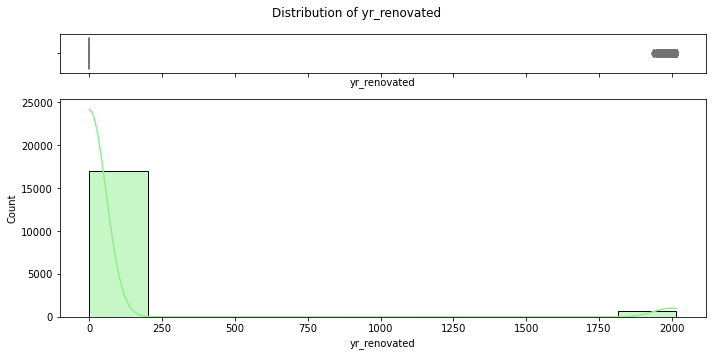

In [20]:
plot_numeric_distribution(data_df, 'yr_renovated', 'Distribution of yr_renovated')

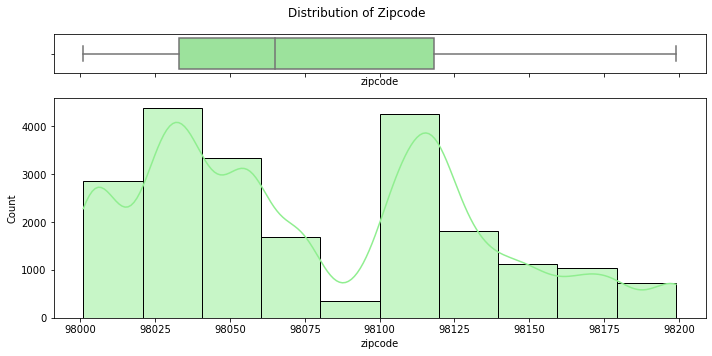

In [21]:
plot_numeric_distribution(data_df, 'zipcode', 'Distribution of Zipcode')

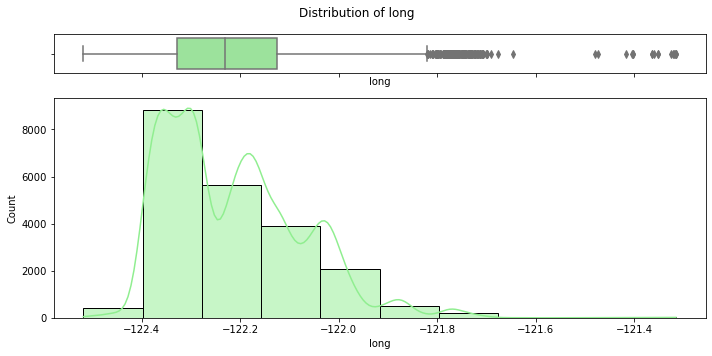

In [22]:
plot_numeric_distribution(data_df, 'long', 'Distribution of long')

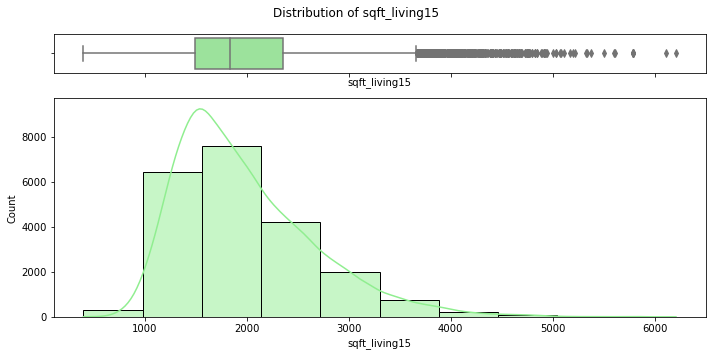

In [23]:
plot_numeric_distribution(data_df, 'sqft_living15', 'Distribution of sqft_living15')

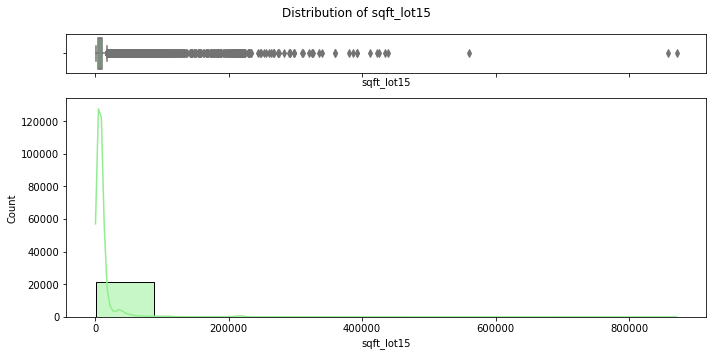

In [24]:
plot_numeric_distribution(data_df, 'sqft_lot15', 'Distribution of sqft_lot15')

In [45]:
data_df.corr()['price']

id            -0.016772
price          1.000000
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
yr_built       0.053953
Name: price, dtype: float64

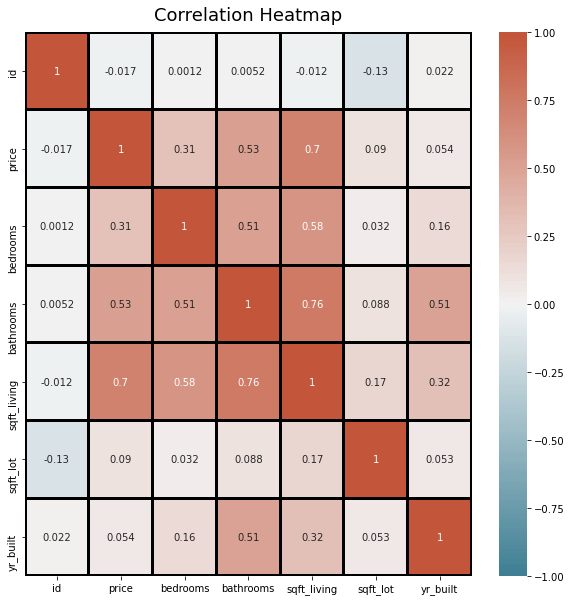

In [46]:
#Correlation heatmap
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(
    data_df.corr(),vmin=-1, vmax=1,center = 0,
    annot=True,cmap=cmap,linewidths=2, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Dropping Columns

In [25]:
#dropping sqft_above,sqft_basement,floors,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated inorder to determine the data we are working with.
data_df.drop(['sqft_above','sqft_basement','floors','zipcode','lat','long','sqft_living15','sqft_lot15','yr_renovated', 'date'], axis=1, inplace =True)

In [26]:
data_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,NaN,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,NO,NONE,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,NO,NONE,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,NO,NONE,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,NaN,NONE,Average,8 Good,2004


In [27]:
#get the sum and view the details 
data_df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
waterfront     2376
view             63
condition         0
grade             0
yr_built          0
dtype: int64

In [28]:
#define a function to fillnas with mode 
columns =['waterfront', 'view']
def fill_numeric_missing(dat, cols):
    for col in cols:
        dat[col].fillna(dat[col].mode()[0], inplace=True)
fill_numeric_missing(data_df, columns) 

In [29]:
fill_numeric_missing(data_df, columns)

In [30]:
data_df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
dtype: int64

### Data Types 

In [31]:
#Print dataframe head to have overview
data_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,NO,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,Average,8 Good,1987


In [32]:
#get the dtypes 
data_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
waterfront      object
view            object
condition       object
grade           object
yr_built         int64
dtype: object

* for now the data seems to be fine we can proceed as it is unless otherwise 

### Outliers 

<AxesSubplot:>

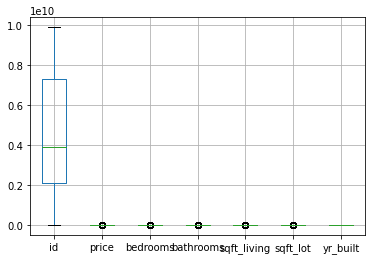

In [33]:
#get the outliers in a boxplot 
scores_columns = ['id','price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot',  'yr_built']
data_df.boxplot(column=scores_columns) 

<AxesSubplot:>

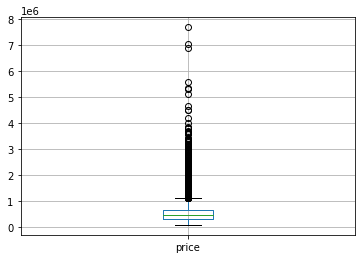

In [34]:
#### Price seems to be the most affected view on its own 
data_df.boxplot(column='price')  

In [35]:
# Getting outliers
def IQR_outliers(dat, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = dat[column].quantile(0.25)
    Q3 = dat[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((dat[column]<(Q1-1.5*IQR)) | (dat[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(dat[column][val])

    
    return outliers, Q1, Q3, IQR


price_outliers = IQR_outliers(data_df, "price")

In [36]:
#sort values to see the highest head and tail values 
data_df['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

#### Outliers conclusion 
* smallest cost $78000- highest cost $ 7700000
* Does it make sense *YES*, why its real data 
* Next 
  * Scale the column so that we have reasonable data 

## Testing the Assumptions

### Linearity

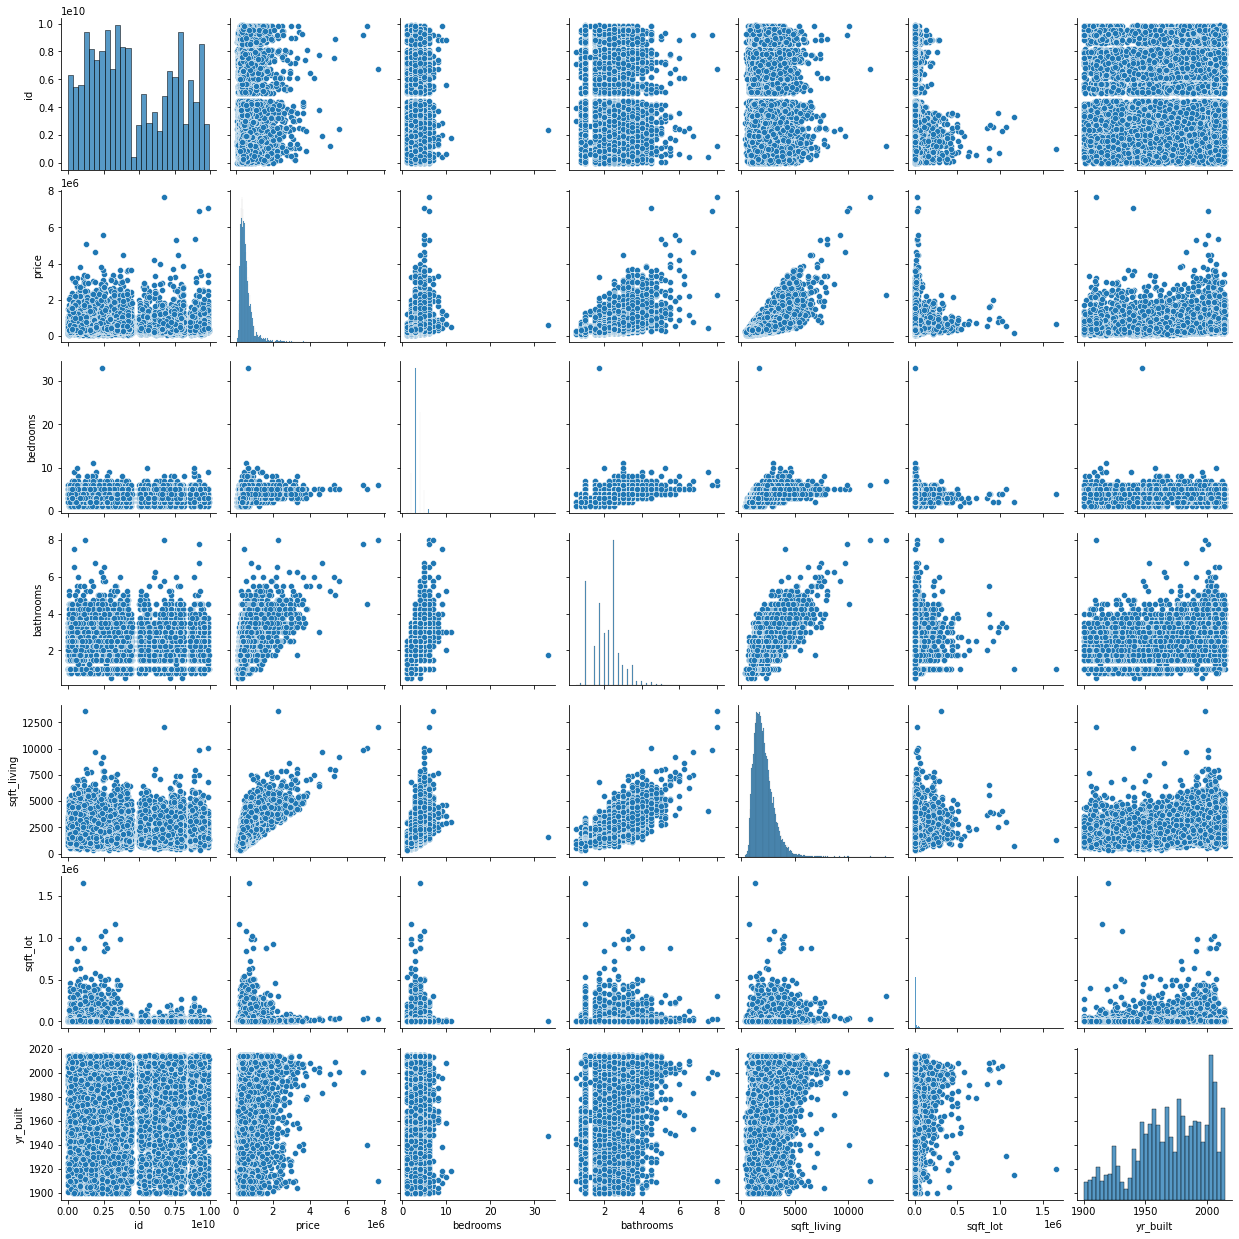

In [37]:
sns.pairplot(data_df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

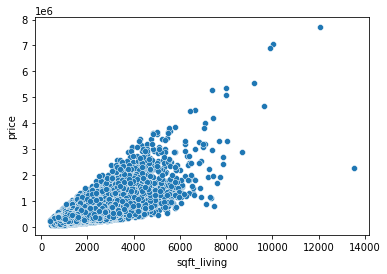

In [38]:
# A scatter plot between price and sqft_living 
Sliving = data_df["sqft_living"]
price = data_df["price"]
sns.scatterplot(data = data_df ,x = Sliving,y = price)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

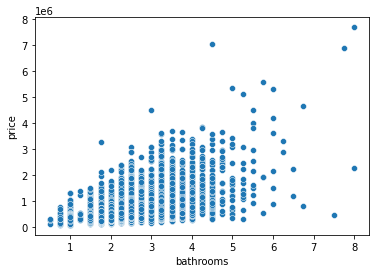

In [48]:
Bathroom = data_df["bathrooms"]
price = data_df["price"]
sns.scatterplot(data = data_df ,x = Bathroom,y = price)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

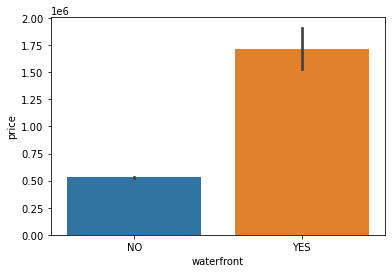

In [50]:
#visualizing categorical variable
waterfront = data_df.waterfront
data =pd.concat([data_df["price"], data_df["waterfront"]], axis=1)
sns.barplot(x=waterfront, y=price, data=data)




# Build a Baseline Simple Linear Regression Model

In [39]:
data_df.corr()['price']

id            -0.016772
price          1.000000
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
yr_built       0.053953
Name: price, dtype: float64

In [40]:
y= data_df['price']
X_baseline= data_df[['sqft_living']]

In [41]:
model= sm.OLS(endog= y, exog= sm.add_constant(X_baseline))
results= model.fit()

In [42]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:16:07   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

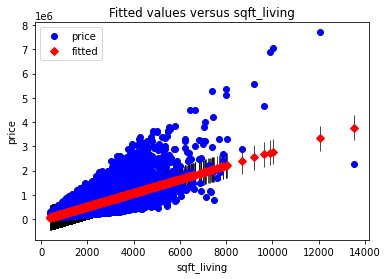

In [51]:
#visualizing the model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

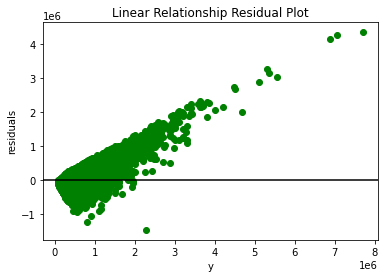

In [52]:
#visualizing the residuals
fig, ax = plt.subplots()

ax.scatter(y, results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### Multicollinearity Analysis

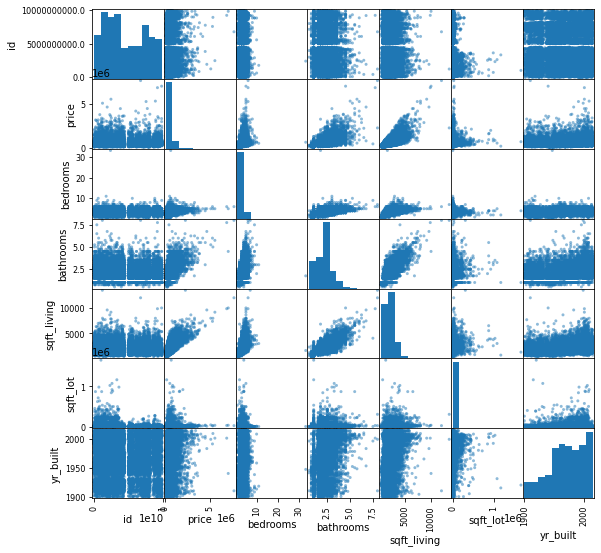

In [43]:
pd.plotting.scatter_matrix(data_df,figsize  = [9, 9]);
plt.show()

This does not make much sense so lets go 

* Include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [44]:
#correlation matrix that have correlations over .75, but less than 1.
df = data_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['price'] = list(zip(df.level_0, df.level_1))

df.set_index(['price'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
price,
"(sqft_living, bathrooms)",0.755758
